#### <div style="text-align: right">Orestis Charalambous</div>

# <center>Self-Care : A Case Study on Mental Health in the Tech Industry</center>


## Description

* [1 Data Preprocessing](#1)
    * [1.1 Loading Data and Examining](#1.1)
    * [1.2 Cleaning Data](#1.2)
        * [1.2.1 Combining Responses](#1.2.1)
        * [1.2.2 Handling Missing Values and Outliers](#1.2.2)
* [2 Visualising Data](#2)
    * [2.1 Geography](#2.1)
    * [2.2 Treatment Distribution](#2.2)
    * [2.3 Relations with Age Group](#2.3)
    * [2.4 Relations with Employee Group](#2.4)
    * [2.5 Employee and Mental Health Resources](#2.5)
    * [2.6 Discussing Consequences on Mental vs Physical health](#2.6)
    * [2.7 Survey Comments Impact](#2.7)
* [3 Feature Engineering](#3)
    * [3.1 Encoding Features to Ordinal Values](#3.1)
    * [3.2 Feature Selection and Correlation Analysis](#3.2)
* [4 Modeling](#4)
    * [4.1 Random Forest](#4.1)
        * [4.1.1 Feature Importance](#4.1.1)
        * [4.1.2 Model Analysis](#4.1.2)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

# Customising style for Graphs
plt.style.use(['ggplot'])
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['grid.color']='#dcdcdc'
plt.rcParams['axes.facecolor']='white'
mpl.rcParams['font.size'] = 15
cmap = sns.diverging_palette(220, 10, as_cmap=True)


#### The dataset used in this project is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech industry.

dataset : https://www.kaggle.com/osmi/mental-health-in-tech-survey

**The dataset contains the following columns with the respective questions:**
***

|  Feature | Question  |
|---|---|
|Timestamp|-|
|Age|-|
|Gender|-|
|Country|-|
|state|If you live in the United States, which state or territory do you live in?|
|self_employed|Are you self-employed?|
|family_history|Do you have a family history of mental illness?|
|treatment|Have you sought treatment for a mental health condition?|
|work_interfere|If you have a mental health condition, do you feel that it interferes with your work?|
|no_employees|How many employees does your company or organization have?|
|remote_work|Do you work remotely (outside of an office) at least 50% of the time?|
|tech_company|Is your employer primarily a tech company/organization?|
|benefits|Does your employer provide mental health benefits?|
|care_options|Do you know the options for mental health care your employer provides?|
|wellness_program|Has your employer ever discussed mental health as part of an employee wellness program?|
|seek_help|Does your employer provide resources to learn more about mental health issues and how to seek help?|
|anonymity|Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?|
|leave|How easy is it for you to take medical leave for a mental health condition?|
|mental_health_consequence|Do you think that discussing a mental health issue with your employer would have negative consequences?|
|phys_health_consequence|Do you think that discussing a physical health issue with your employer would have negative consequences?|
|coworkers|Would you be willing to discuss a mental health issue with your coworkers?|
|supervisor|Would you be willing to discuss a mental health issue with your direct supervisor(s)?|
|mental_health_interview|Would you bring up a mental health issue with a potential employer in an interview?|
|phys_health_interview|Would you bring up a physical health issue with a potential employer in an interview?|
|mental_vs_physical|Do you feel that your employer takes mental health as seriously as physical health?|
|obs_consequence|Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?|
|comments|Any additional notes or comments|

***

## 1 Data Preprocessing <a class="anchor" id="1"></a>

### 1.1 Loading Data and Examining<a class="anchor" id="1.1"></a>

In [2]:
df = pd.read_csv(r'survey.csv')
print('The survey has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.head(3)

The survey has 1259 rows and 27 columns


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-28 09:59:39,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259,NaN,NaN,NaN,7.94281e+07,2.8183e+09,-1726,27,31,36,1e+11
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### 1.2 Cleaning Data<a class="anchor" id="1.2"></a>

#### 1.2.1 Combining responses<a class="anchor" id="#1.2.1"></a>

In [5]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

As seen above, Gender is does not have few unique variables, so we are combine similar responses with the function below into one category for an easier analysis on our data.
    

In [6]:
female = [ 'Female','Trans-female','Cis Female', 'F','Woman','f',
          'Femake', 'woman','female','Female ','cis-female/femme',
          'Trans woman', 'Female (trans)', 'Female (cis)','femail','queer/she/they',]

male = [ 'Male','M', 'male', 'm', 'Male-ish', 'maile', 'something kinda male?',
       'Cis Male', 'Mal', 'Male (CIS)', 'Androgyne', 'male leaning androgynous',
       'Make', 'Guy (-ish) ^_^','Male ', 'Man', 'msle', 'Mail', 'cis male','Malr',
        'Cis Man','ostensibly male, unsure what that really means']

other = ['non-binary','Nah', 'All', 'Enby','fluid', 'Genderqueer', 'Agender',
         'Neuter','queer', 'A little about you','p']

gender_list = [female, male, other]

for gender in gender_list:
    for num,info in enumerate(gender):
        if num > 0:
            df['Gender'][df['Gender']==info] = gender[0]

            
df["Gender"].replace({"non-binary": "Other"}, inplace=True)
            
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df['Gender'].value_counts()

Male      996
Female    252
Other      11
Name: Gender, dtype: int64

Dropping state column to emphasise based on the country and Timestamp column because we are not gonna use it in our analysis.

In [8]:
df.drop(columns=['state', 'Timestamp'],inplace=True)

#### 1.2.1 Handling Missing Values and Outliers<a class="anchor" id="1.2.2"></a>

In [9]:
#Missing values

#Fill NaN values in comment column with empty text
df['comments'] = df['comments'].fillna(value='')

#Self employed
df['self_employed'] = df['self_employed'].fillna('No')

#Work interfere
df['work_interfere'] = df['work_interfere'].fillna('Sometimes')


df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

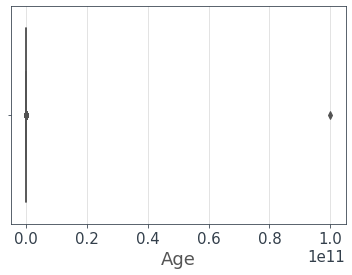

In [10]:
#Visualising Age column in a boxplot to idenitify outliers
sns.boxplot(df['Age'])

We drop the age outliers as there were some extraordinary values that were affecting the data.

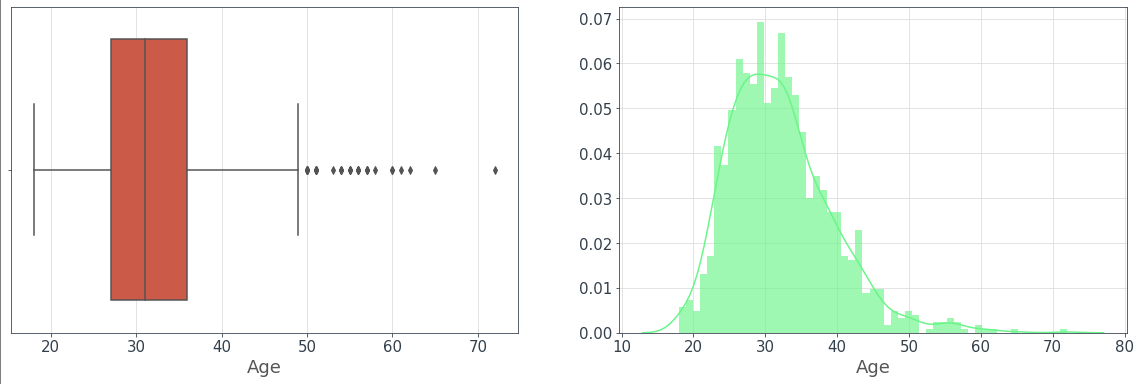

In [11]:
#Asuming Adults, so +18 and the oldest person to be 122 years old.

df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 122].index, inplace = True) 

plt.figure(figsize=(20, 6), linewidth=1)
plt.subplot(1,2,1)
sns.boxplot(df['Age'])

plt.subplot(1,2,2)
sns.distplot(df["Age"], bins=55, hist_kws={'alpha':.65},  color='#6AF589')

A fairly good age distribution with no outliers shown on the graph on the right. Median age is shown in the boxplot to be around 31 years old.


## 2 Visualising Data <a class="anchor" id="2"></a>

In this section we aim to uncover some patterns on employees interacting with their employer about their mental health. It will be mainly about Univariate and Bivariate Analysis.

### 2.1 Geographic distribution <a class="anchor" id="2.1"></a>

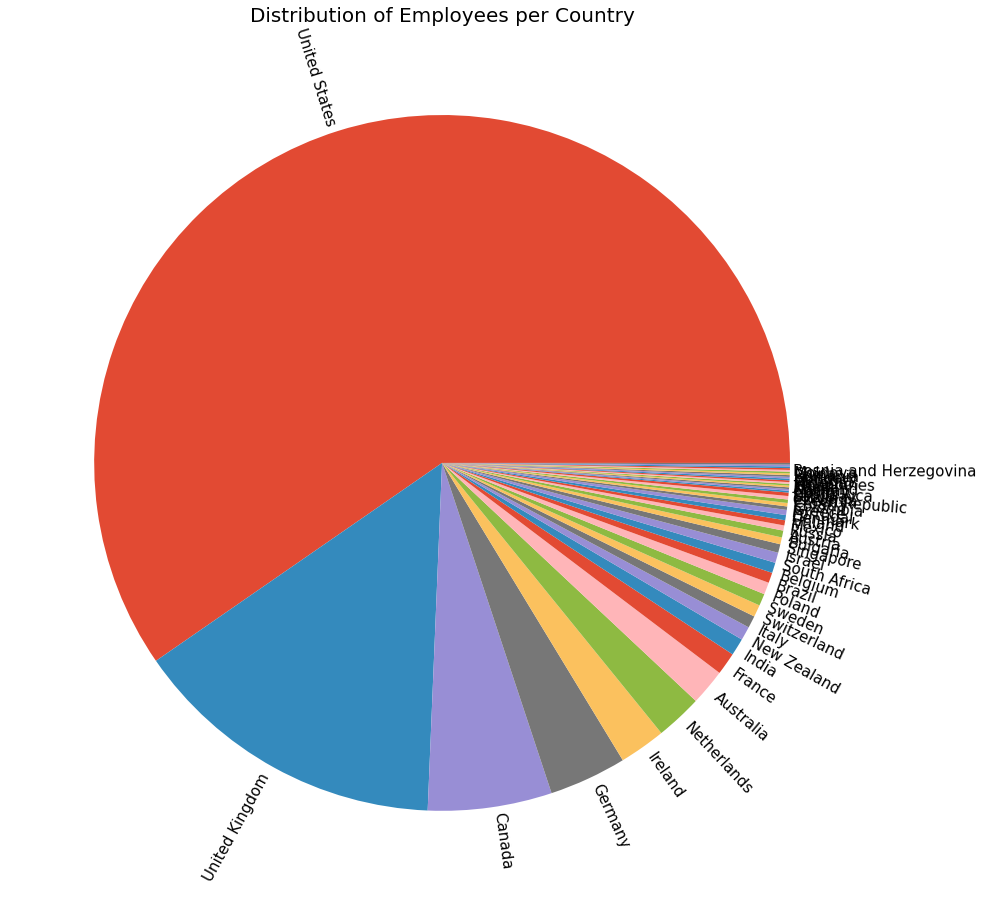

,count
United States,746
United Kingdom,184
Canada,72
Germany,45
Ireland,27
Netherlands,27
Australia,21
France,13
India,10
New Zealand,8


In [12]:
plt.figure(num=1, figsize=(16,16))
plt.pie(x=df['Country'].value_counts(), labels=df['Country'].value_counts().index,
        labeldistance=1.01, rotatelabels = bool)
plt.title('Distribution of Employees per Country',fontsize=20)
plt.show()

country_count = df['Country'].value_counts().sort_values(ascending=False).to_frame()
country_count = country_count.rename(columns={'Country': 'count'})
table_country = country_count.style.background_gradient(cmap=cmap)
table_country

The majority of the cases in our analysis are shown to be from the United States.

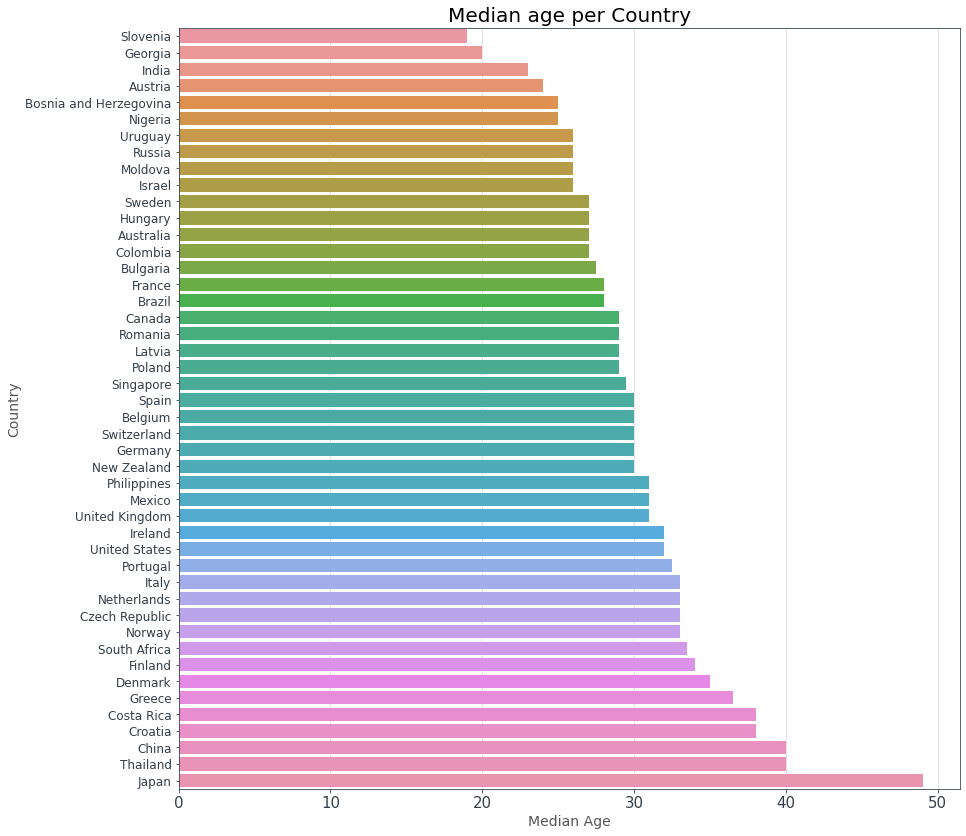

In [13]:
#Grouping the country column into a variable so we can make analysis based on the country
country=df.groupby(df['Country'])

median_age = country['Age'].aggregate(np.median).sort_values()
plt.figure(num=1, figsize=(14,14))
sns.barplot( median_age, median_age.index)
plt.yticks(fontsize = 12)
plt.title('Median age per Country',fontsize=20)
plt.xlabel('Median Age', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.show()

### 2.2 Treatment Distribution <a class="anchor" id="2.2"></a>

In [14]:
country['treatment','remote_work','self_employed'].describe()

treatment                  remote_work              \
                           count unique  top freq       count unique  top   
Country                                                                     
Australia                     21      2  Yes   13          21      2   No   
Austria                        3      1   No    3           3      2  Yes   
Belgium                        6      2   No    5           6      1   No   
Bosnia and Herzegovina         1      1   No    1           1      1  Yes   
Brazil                         6      2   No    4           6      2   No   
Bulgaria                       4      2   No    2           4      2  Yes   
Canada                        72      2  Yes   37          72      2   No   
China                          1      1   No    1           1      1  Yes   
Colombia                       2      1   No    2           2      1   No   
Costa Rica                     1      1   No    1           1      1  Yes   
Croatia                        2      1  Yes    2           2      1  Yes   
Czech Republic                 1      1   No    1           1      1   No   
Denmark                        2      1  Yes    2           2      1   No   
Finland                        3      2   No    2           3      2   No   
France                        13      2   No   11          13      2   No   
Georgia                        1      1   No    1           1      1   No   
Germany                       45      2   No   24          45      2   No   
Greece                         2      1   No    2           2      1  Yes   
Hungary                        1      1   No    1           1      1  Yes   
India                         10      2   No    7          10      2   No   
Ireland                       27      2   No   14          27      2   No   
Israel                         5      1   No    5           5      1   No   
Italy                          7      2   No    6           7      1   No   
Japan                          1      1  Yes    1           1      1  Yes   
Latvia                         1      1   No    1           1      1   No   
Mexico                         3      2   No    2           3      2  Yes   
Moldova                        1      1  Yes    1           1      1   No   
Netherlands                   27      2   No   18          27      2   No   
New Zealand                    8      2  Yes    5           8      2   No   
Nigeria                        1      1   No    1           1      1   No   
Norway                         1      1   No    1           1      1   No   
Philippines                    1      1   No    1           1      1   No   
Poland                         7      2  Yes    4           7      2  Yes   
Portugal                       2      1   No    2           2      1   No   
Romania                        1      1   No    1           1      1  Yes   
Russia                         3      1   No    3           3      2   No   
Singapore                      4      2   No    3           4      2   No   
Slovenia                       1      1  Yes    1           1      1   No   
South Africa                   6      2  Yes    4           6      2   No   
Spain                          1      1   No    1           1      1   No   
Sweden                         7      2   No    5           7      1   No   
Switzerland                    7      2   No    4           7      1   No   
Thailand                       1      1   No    1           1      1   No   
United Kingdom               184      2   No   92         184      2   No   
United States                746      2  Yes  408         746      2   No   
Uruguay                        1      1   No    1           1      1  Yes   

                            self_employed                   
                       freq         count unique  top freq  
Country                                                     
Australia                13            21      2   No   19  
Austr

From this we find out that countries like United states, Australia, United Kingdom and Canada have more than 50% of surveyed people who have or had a treatment for their mental health problems. More shown in the graphs in the next section.


Text(0.5, 1.0, 'Treatement Distribution by Age')

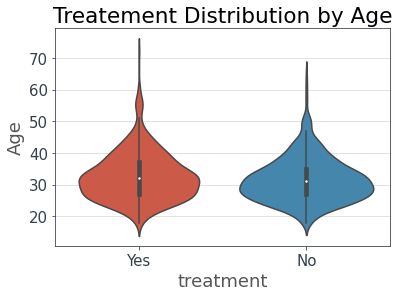

In [15]:
sns.violinplot(data = df, y='Age', x='treatment')
plt.title('Treatement Distribution by Age')

### 2.3 Relations with Age Group <a class="anchor" id="2.3"></a>

Text(0.5, 1.0, 'Age Group vs interfere')

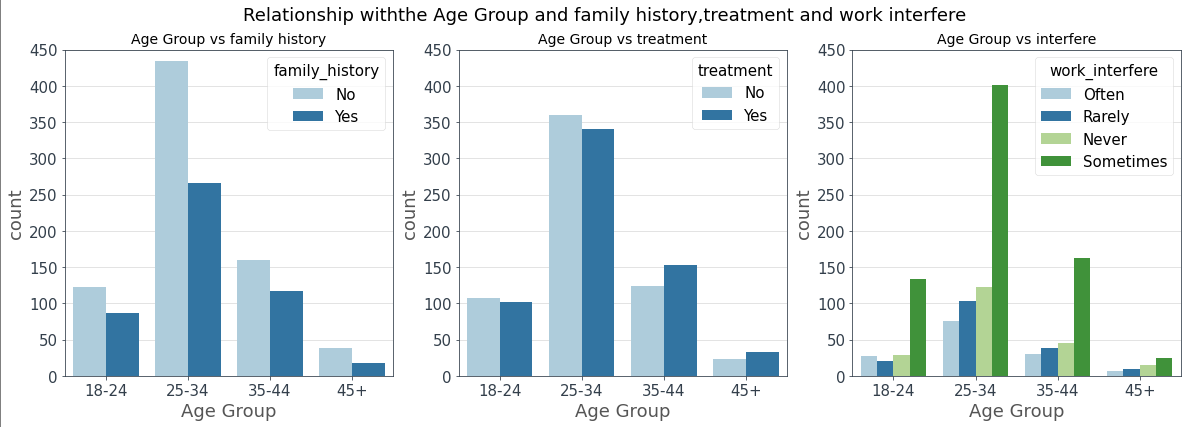

In [16]:
df['Age Group'] = pd.cut(df['Age'].dropna(),[18,25,35,45,99], labels=['18-24','25-34','35-44','45+'])

plt.figure(figsize=(20, 6), linewidth=1)
plt.suptitle('Relationship withthe Age Group and family history,treatment and work interfere',
            fontsize = 18)

plt.subplot(1,3,1)
sns.countplot(data=df,x = 'Age Group',hue= 'family_history', palette='Paired')
plt.ylim(0,450)
plt.title('Age Group vs family history', fontsize = 14)

plt.subplot(1,3,2)
sns.countplot(data = df,x = 'Age Group', hue='treatment', hue_order=["No", "Yes"], palette='Paired')
plt.ylim(0,450)
plt.title('Age Group vs treatment', fontsize = 14)

plt.subplot(1,3,3)
sns.countplot(data = df,x = 'Age Group', hue='work_interfere', palette='Paired')
plt.ylim(0,450)
plt.title('Age Group vs interfere', fontsize = 14)

### 2.4 Relations with Employee Group <a class="anchor" id="2.4"></a>

(0.0, 300.0)

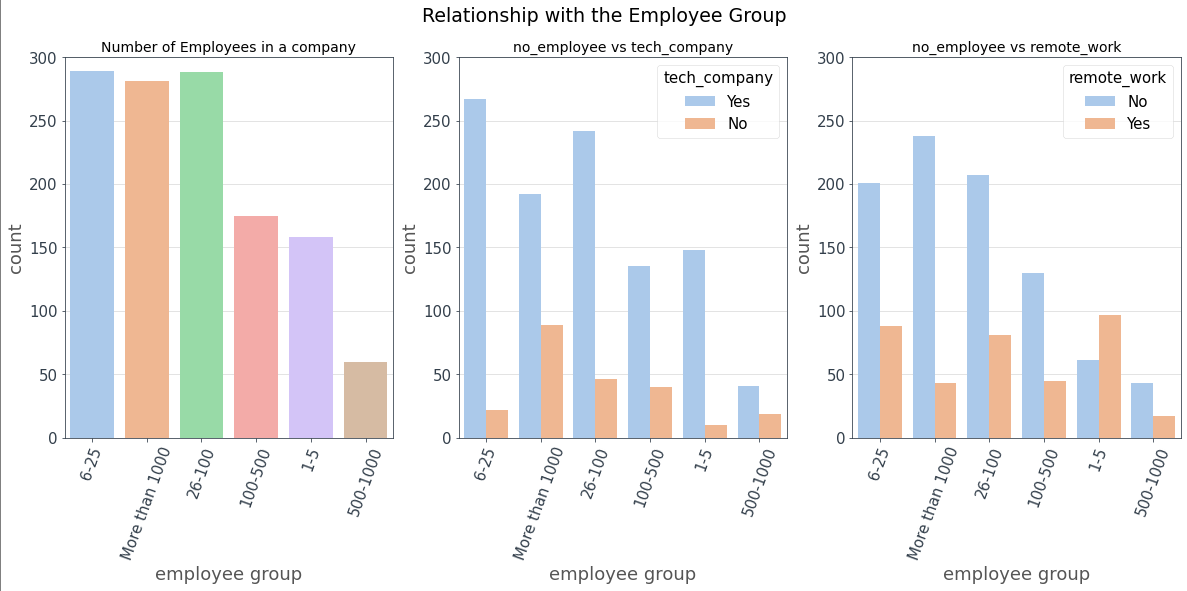

In [17]:
plt.figure(figsize=(20, 7), linewidth=1)
plt.suptitle('Relationship with the Employee Group',
            fontsize = 19)

plt.subplot(1,3,1)
employee_count  = Counter(df['no_employees'].tolist())
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot( x = employee_group , y = employee_val, palette='pastel' )
plt.title('Number of Employees in a company', fontsize = 14)
plt.ylabel('count')
plt.xlabel('employee group')
plt.xticks(rotation = 70)
plt.ylim(0,300)

plt.subplot(1,3,2)
sns.countplot(data = df,x = 'no_employees', hue ='tech_company', palette='pastel' )
plt.title('no_employee vs tech_company', fontsize = 14)
plt.xticks(rotation = 70)
plt.xlabel('employee group')
plt.ylim(0,300)

plt.subplot(1,3,3)
sns.countplot(data = df,x = 'no_employees', hue ='remote_work', palette='pastel')
plt.title('no_employee vs remote_work', fontsize = 14)
plt.xticks(rotation = 70)
plt.xlabel('employee group')
plt.ylim(0,300)

### 2.5 Employee and Mental Health Resources<a class="anchor" id="2.5"></a>

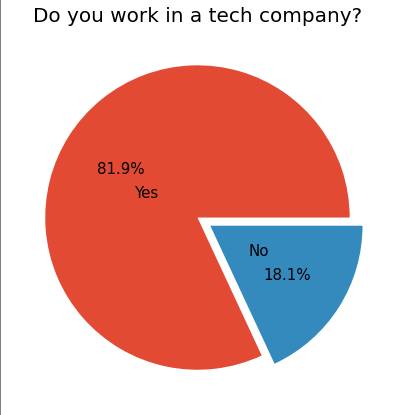

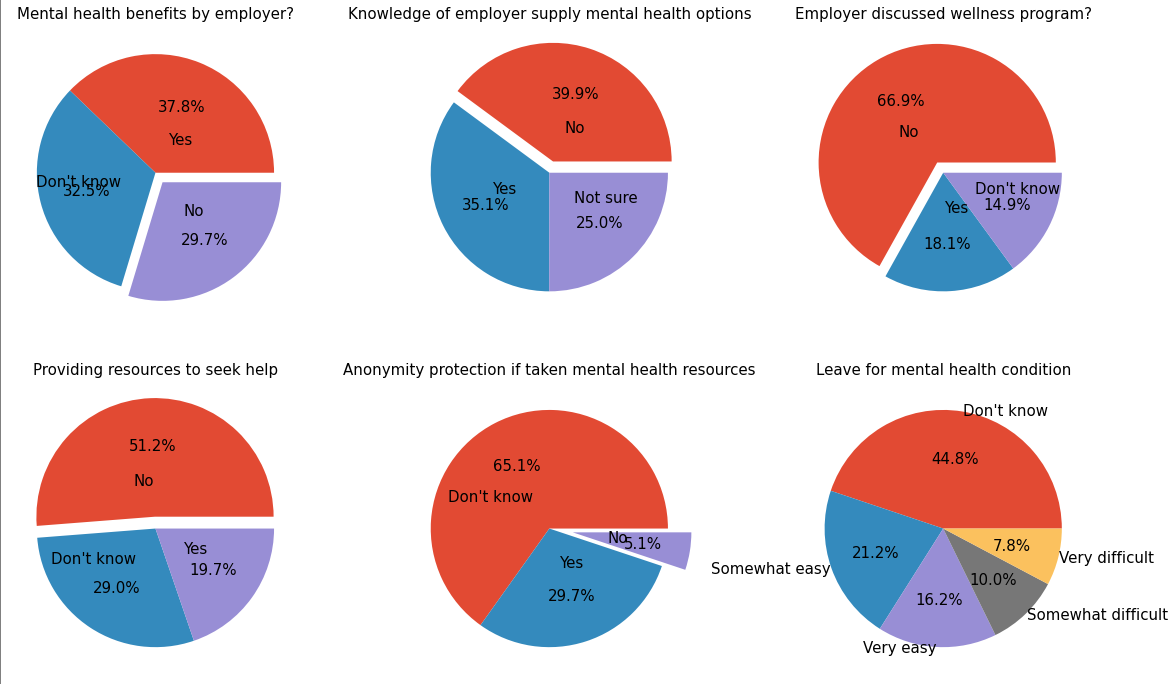

In [18]:
plt.figure(figsize=(7, 7), linewidth=1)

explode = (0, 0.1)
plt.pie(x=df['tech_company'].value_counts(), labels=df['tech_company'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%", explode=explode)
plt.title('Do you work in a tech company?',fontsize=20)
plt.show()

plt.figure(figsize=(20, 12), linewidth=1)
plt.subplot(2,3,1)
plt.pie(x=df['benefits'].value_counts(), labels=df['benefits'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%", explode=(0,0, 0.1))
plt.title('Mental health benefits by employer?',fontsize=15)

plt.subplot(2,3,2)
plt.pie(x=df['care_options'].value_counts(), labels=df['care_options'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%",explode=(0.1,0, 0))
plt.title('Knowledge of employer supply mental health options',fontsize=15)

plt.subplot(2,3,3)
plt.pie(x=df['wellness_program'].value_counts(), labels=df['wellness_program'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%",explode=(0.1,0, 0))
plt.title('Employer discussed wellness program?',fontsize=15)

plt.subplot(2,3,4)
plt.pie(x=df['seek_help'].value_counts(), labels=df['seek_help'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%",explode=(0.1,0, 0))
plt.title('Providing resources to seek help',fontsize=15)

plt.subplot(2,3,5)
plt.pie(x=df['anonymity'].value_counts(), labels=df['anonymity'].value_counts().index,
        labeldistance=0.3, autopct="%.1f%%",explode=(0,0, 0.2))
plt.title('Anonymity protection if taken mental health resources',fontsize=15)

plt.subplot(2,3,6)
plt.pie(x=df['leave'].value_counts(), labels=df['leave'].value_counts().index,
        labeldistance=1.01, autopct="%.1f%%")
plt.title('Leave for mental health condition',fontsize=15)

plt.show()


From this we can find that people find it somewhat on a easier side to get a leave sanctioned for mental health reasons because employers feel that mental health demands immense importance than work. The company may sometimes deem to be responsible if its employeers health degrades.Hence companies dont take any risks which could be one of the prime reasons.

### 2.6 Discussing Consequences on Mental vs Physical health<a class="anchor" id="2.6"></a>

(0.0, 1000.0)

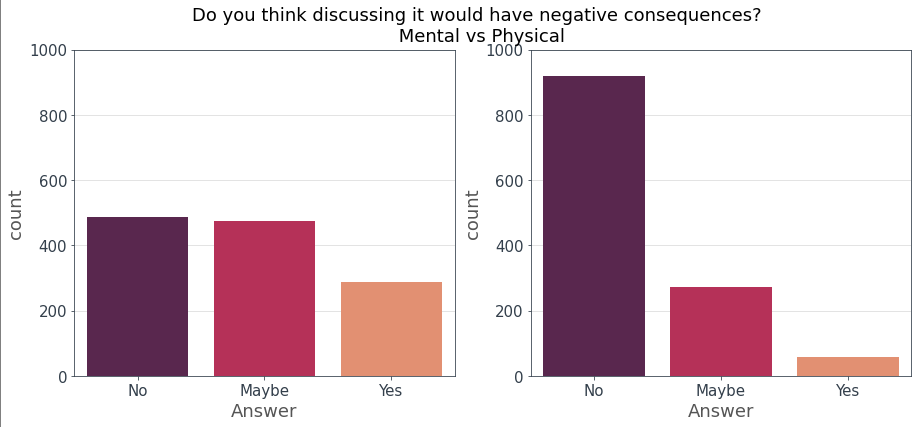

In [19]:
plt.figure(figsize=(15, 6), linewidth=1)
plt.suptitle('Do you think discussing it would have negative consequences? \n Mental vs Physical')

plt.subplot(1,2,1)
ment_health  = Counter(df['mental_health_consequence'].tolist())
ment_group = np.asarray(list(ment_health.keys()))
ment_val = np.asarray(list(ment_health.values()))
sns.barplot( x = ment_group , y = ment_val, palette="rocket")
plt.xlabel('Answer')
plt.ylabel('count')
plt.ylim(0,1000)


plt.subplot(1,2,2)
phys_health  = Counter(df['phys_health_consequence'].tolist())
phys_group = np.asarray(list(phys_health.keys()))
phys_val = np.asarray(list(phys_health.values()))
sns.barplot( x = phys_group , y = phys_val, order= ment_group, palette="rocket")
plt.xlabel('Answer')
plt.ylabel('count')
plt.ylim(0,1000)


It is a good to see that people dont feel that discussing a mental health issue with your employer would have negative consequences. So people are ready to share their issues so that they feel light on heart. The same is the case with physical health too.

### 2.7 Survey Comments Impact<a class="anchor" id="2.7"></a>

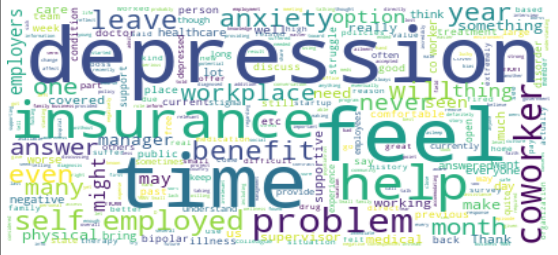

In [20]:
# WORD CLOUD

#Filtering out some common stopwords for the comments answers
stopwords = set(STOPWORDS) 
stopwords.update(["company","issues","work", "employer", "know","health","mental","job",'',
                "take","issue","hour","tech","industry","question","people","questions","employee"])

# Initialise Word Cloud
wc = WordCloud(background_color="white", max_words=1000, margin=0, stopwords = stopwords)

# Generating and Visualising Word Cloud
plt.figure(figsize=(8, 4), linewidth=1)
wc.generate(df.comments.str.cat(sep=' '))
plt.imshow(wc.recolor(random_state=3), interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.tight_layout(rect=[0, 0, 1, .95]);

## 3 Feature Engineering <a class="anchor" id="3"></a>

### 3.1 Encoding Features to Ordinal Values <a class="anchor" id="3.1"></a>

All of the questions have categorical answers.

In the future, we could use categorical encoding for them. I use OrdinalEncoder for all columns with the exception of 'Timestamp', 'comments', 'Age', 'state', 'age group'.

In [21]:
#Creating new dataframe

df_copy = df.copy()
encoder = OrdinalEncoder()
df_copy = encoder.fit_transform(df_copy.drop(['comments', 'Age Group'], axis=1))
df_enc = pd.DataFrame(data=df_copy, columns=['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])

df_enc.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19.0,0.0,44.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,...,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0
1,26.0,1.0,44.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,14.0,1.0,6.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,...,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0
3,13.0,1.0,43.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0
4,13.0,1.0,44.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0


### 3.2 Feature Selection and Correlation Analysis <a class="anchor" id="3.2"></a>

Correlation is a simple approach to find linear dependence between features.Also there might be some multi-collinearity between the features.

<Figure size 432x288 with 0 Axes>

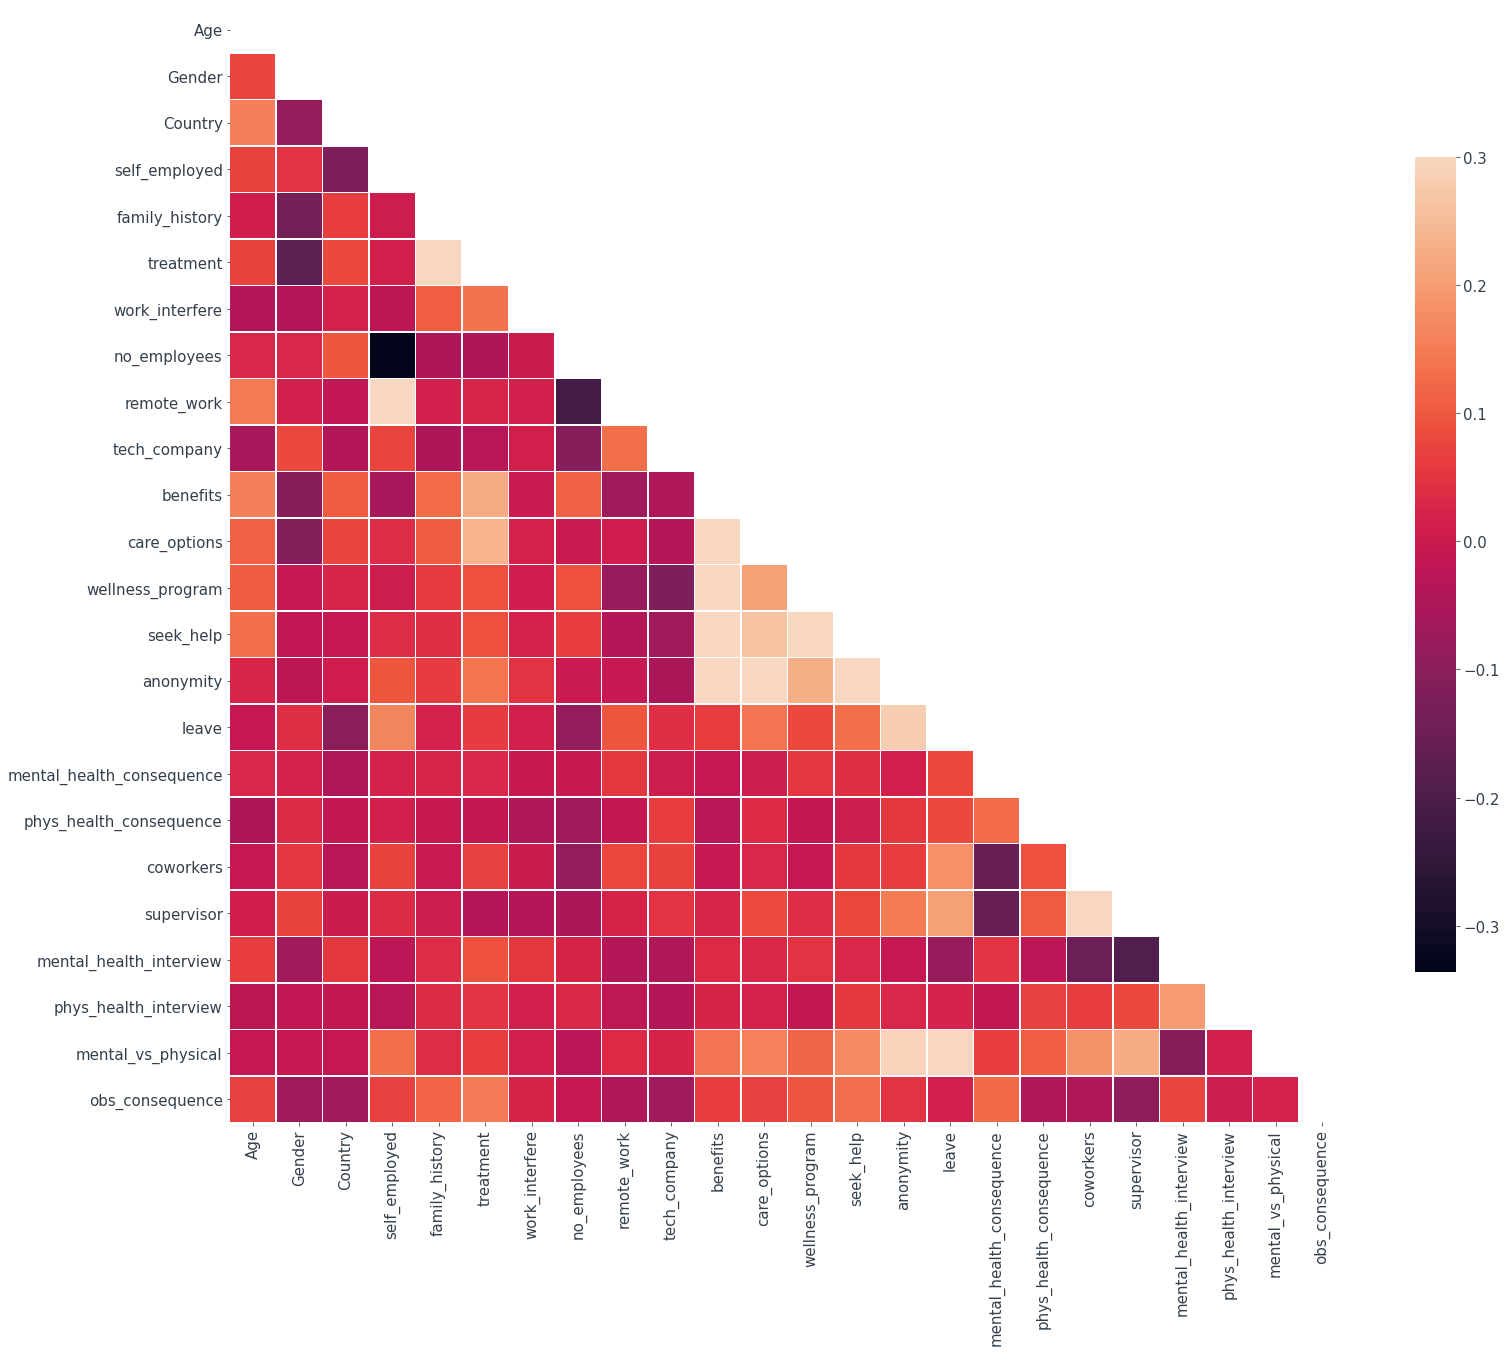

In [22]:
corrmat = df_enc.corr(method ='pearson')
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure()
plt.subplots(figsize=(25, 25))
cmap = 'rocket'
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=0.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()

High correlation is had between ['wellness_program' and 'seek_help'] and ['state' and 'country']

For our target value (treatment) high correlation have 'care_options', 'work interface', 'benefits'.

**Correlation for 'treatment' column:**

<Figure size 432x288 with 0 Axes>

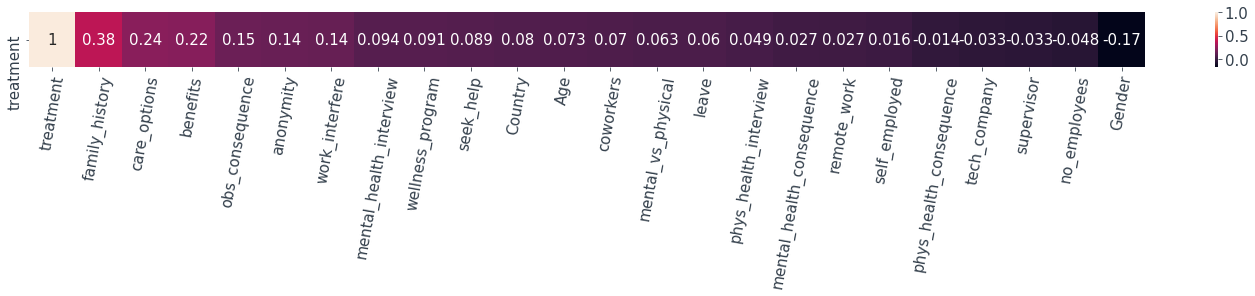

In [23]:
plt.figure()
plt.subplots(figsize=(25, 1))

treatment = corrmat.sort_values(by=['treatment'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['treatment'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.xticks(rotation =80)
plt.show()

Splitting dataset

## 4 Modeling <a class="anchor" id="4"></a>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_enc.drop(['treatment'], axis=1),
                                                    df_enc.treatment, test_size=0.30, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 66 to 1126
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        875 non-null    float64
 1   Gender                     875 non-null    float64
 2   Country                    875 non-null    float64
 3   self_employed              875 non-null    float64
 4   family_history             875 non-null    float64
 5   work_interfere             875 non-null    float64
 6   no_employees               875 non-null    float64
 7   remote_work                875 non-null    float64
 8   tech_company               875 non-null    float64
 9   benefits                   875 non-null    float64
 10  care_options               875 non-null    float64
 11  wellness_program           875 non-null    float64
 12  seek_help                  875 non-null    float64
 13  anonymity                  875 non-null    float

### 4.1 Random Forest <a class="anchor" id="4.1"></a>

Random Forest is an ensemble algorithm that builds multiple decisiontrees, therefore a forest. Gives each tree a random same size subset of the features for training. Each tree creates class predictions and the tree with the most votesbecomes the model's predictions.
The final prediction of the random forest is made by averaging thepredictions of each tree.

We chose it because its simple, intuitive and easy to implement. Training steps are faster than other machine learning methods. Has no assumptions. Perfect for our dataset.

In [25]:
rf_mdl = RandomForestClassifier(max_depth=40,min_samples_split=10, n_estimators=50, random_state=1)
rf_mdl = rf_mdl.fit(X_train,y_train)

#### 4.1.1 Feature Importance <a class="anchor" id="4.1.1"></a>

Here we identify feature importance on predictor

Text(0, 0.5, 'Normalised Importance')

<Figure size 1152x576 with 0 Axes>

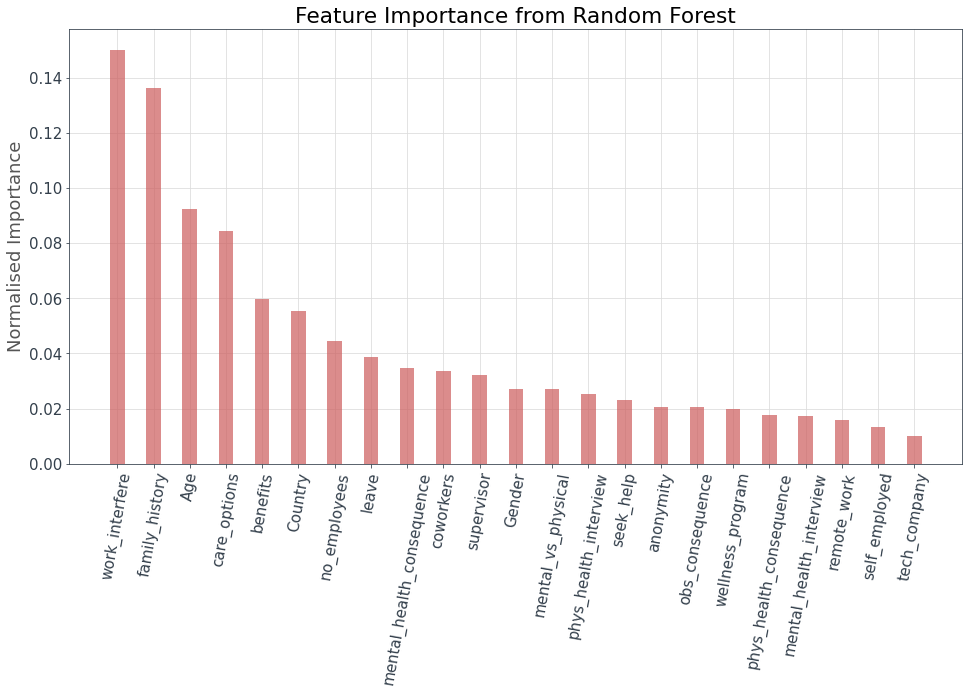

In [26]:
predictions = rf_mdl.predict(X_test)
columns_scale = X_train.columns.tolist()
plt.figure(figsize=(16,8)) 
plt.subplots(figsize=(16,8))

#Creating a dictionary to plot it on a bar graph
feature_imp = {columns_scale[i]: rf_mdl.feature_importances_[i] for i in range(len(columns_scale))} 
sorted_d = dict( sorted(feature_imp.items(), key=operator.itemgetter(1),reverse=True))
plt.bar(sorted_d.keys(), sorted_d.values(), width=0.40, color='indianred', alpha = 0.7)
plt.xticks(rotation=80)
plt.title('Feature Importance from Random Forest')
plt.ylabel('Normalised Importance')


#### 4.1.2 Model Analysis <a class="anchor" id="4.1.2"></a>


----------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       176
         1.0       0.77      0.73      0.75       200

    accuracy                           0.74       376
   macro avg       0.74      0.74      0.74       376
weighted avg       0.74      0.74      0.74       376


-----------Confusion Matrix--------------------------


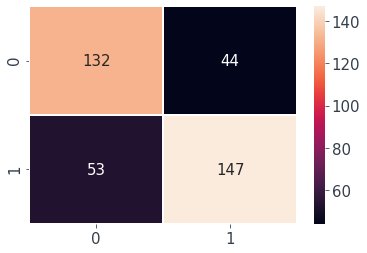

In [27]:
cnf_matrix=confusion_matrix(y_test,predictions)
sns.heatmap(cnf_matrix,cmap="rocket",annot=True,linewidths=0.5, fmt=".0f")
print("\n----------Classification Report---------------------")
print(classification_report(y_test, predictions))
print("\n-----------Confusion Matrix--------------------------")